<a href="https://colab.research.google.com/github/9james/deep-learning/blob/master/chestxray_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [27]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonnys","key":"ff50ecf05f27c816d59b6f7dfbab76d0"}'}

In [28]:
ls -1ha kaggle.json

kaggle.json


In [29]:
!ls

kaggle.json  sample_data


In [30]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2318           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      16430           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5253           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         57           False  
google-quest-challenge                         2020-02-10 23:59:00  Featured           $25,000        155           False  
tensorflow2-question-answering                 2020-01-22 23:59:00  Featured           $50,000        706           False  
data-sci

In [31]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:26<00:00, 126MB/s]
100% 2.29G/2.29G [00:26<00:00, 91.6MB/s]


In [0]:
!unzip chest-xray-pneumonia.zip

In [75]:


!ls chest_xray/train

!find ./chest_xray/train/PNEUMONIA -type f -print0 | sort -zR | tail -zn +1400 | xargs -0 rm
!ls -l chest_xray/train/NORMAL | wc -l
!ls -l chest_xray/train/PNEUMONIA | wc -l

NORMAL	PNEUMONIA
1342
1400


In [78]:
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers

input_shape=150,150,3
image_size=150,150

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5));
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5));
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])




Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)      

In [80]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    '/content/chest_xray/train',
    target_size=image_size,
    batch_size=20,
    class_mode='binary'
)

validation_generator=val_datagen.flow_from_directory(
    '/content/chest_xray/val',
    target_size=image_size,
    batch_size=20,
    class_mode='binary'
)

test_generator=test_datagen.flow_from_directory(
    '/content/chest_xray/test',
     target_size=image_size,
    batch_size=20,
    class_mode='binary'
)







Found 2740 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [81]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='/content/gdrive/My Drive/chestxray2.h5',
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        save_best_only=True,
        monitor='val_loss',
        verbose=1)
]


history=model.fit_generator(
    train_generator,
    # steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
137/137 [==============================] - 54s 397ms/step - loss: 0.4681 - acc: 0.7631 - val_loss: 0.5322 - val_acc: 0.8125
Epoch 2/30
137/137 [==============================] - 49s 360ms/step - loss: 0.2270 - acc: 0.9084 - val_loss: 0.5223 - val_acc: 0.8750
Epoch 3/30
137/137 [==============================] - 50s 365ms/step - loss: 0.1903 - acc: 0.9263 - val_loss: 0.4713 - val_acc: 0.6875
Epoch 4/30
137/137 [==============================] - 50s 364ms/step - loss: 0.1501 - acc: 0.9416 - val_loss: 0.4754 - val_acc: 0.6875
Epoch 5/30
137/137 [==============================] - 50s 364ms/step - loss: 0.1297 - acc: 0.9507 - val_loss: 0.4125 - val_acc: 0.6875
Epoch 6/30
137/137 [==============================] - 50s 364ms/step - loss: 0.1296 - acc: 0.9544 - val_loss: 0.2765 - val_acc: 0.9375
Epoch 7/30
137/137 [==============================] - 51s 369ms/step - loss: 0.1213 - acc: 0.9566 - val_loss: 0.4648 - val_acc: 0.6875
Epoch 8/30
137/137 [==============================] - 5

In [0]:
#model.save('/content/gdrive/My Drive/chestxray2.h5')

In [83]:
test_loss,test_acc=model.evaluate_generator(test_generator,steps=50)
print('test loss: ',test_loss,'  ','test_acc: ',test_acc )

test loss:  1.1497356231983116    test_acc:  0.7855691122330302


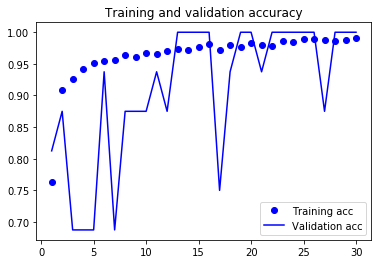

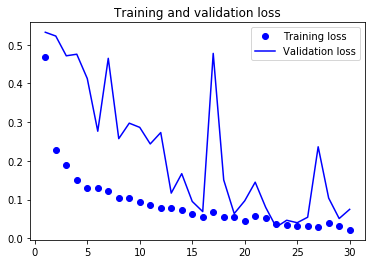

In [84]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
